# 실습 과제

* 데이터셋 설명이 되어 있는 홈페이지입니다. https://www.kaggle.com/datasets/camnugent/california-housing-prices
* 유명한 데이터셋 중 하나이기에 구글링 하면 관련 자료, 코드, 설명 등을 확인할 수 있습니다. 이번 과제는 이 데이터셋을 활용해 전처리를 진행해보는 것입니다.
* 수업에서 배운 내용을 바탕으로 전처리를 진행해보세요. 아래에 비어져 있는 칸을 자유롭게 채우시면 됩니다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [42]:
import platform                

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows': # 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [2]:
# 데이터 로드
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Goal 주택가격 예측
#### | MedInc | 블록의 중간 소득 | 
#### | HouseAge | 블록의 중간 주택 연도 |
#### | AveRooms | 주택 1가구당 평균 방의 수 |
#### | AveBedrms | 주택 1가구당 평균 침실의 수 |
#### | Population | 인구 |
#### | AveOccup |  average house occupancy 평균 주택점유율 |
#### | Latitude | 위도 |
#### | Longitude | 경도 |
#### | Target | MedHouseVal | The median house price of the region |

In [4]:
# 데이터 탐색
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df.rename(columns= {'MedHouseVal':'Target'},inplace=True)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [12]:
# 결측치 확인 및 처리
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [14]:
# 이상치 탐지 (시각화, or scaler 사용)
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


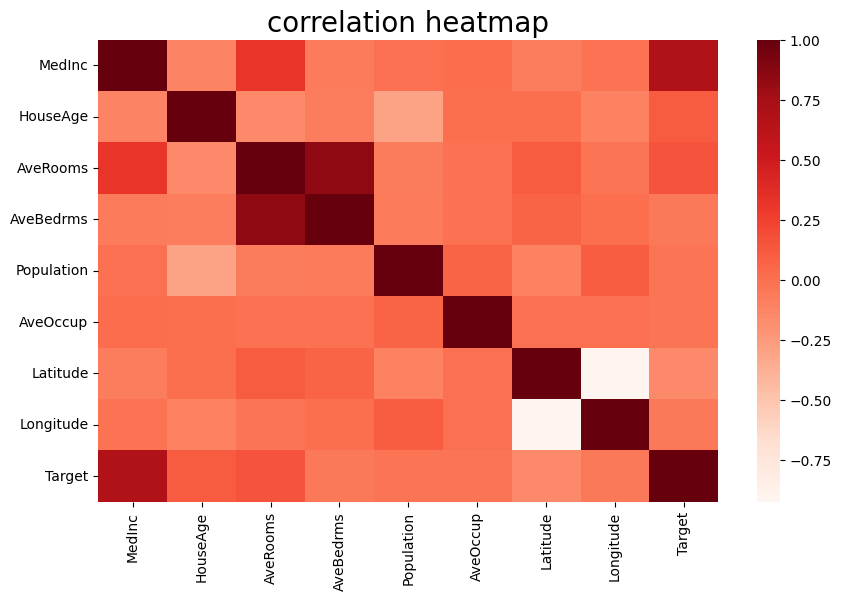

In [26]:
plt.figure(figsize = (10,6))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="Reds")
plt.title('correlation heatmap',size=20)
plt.show()

In [27]:
# Target은 MedInc,HouseAge,AveRooms와 강한 상관관계를 가지고 있음을 확인 할 수 있음
# AveRooms,AveBedrms는 매우 강한 상관관계를 가지고 있음으로 이를 확인해 보는 작업이 필요해 보임
# AveRooms, MedInc은 강한 상관관계를 가지고 있는 것으로 확인됨으로 따로 확인을 해볼 필요가 있어 보임

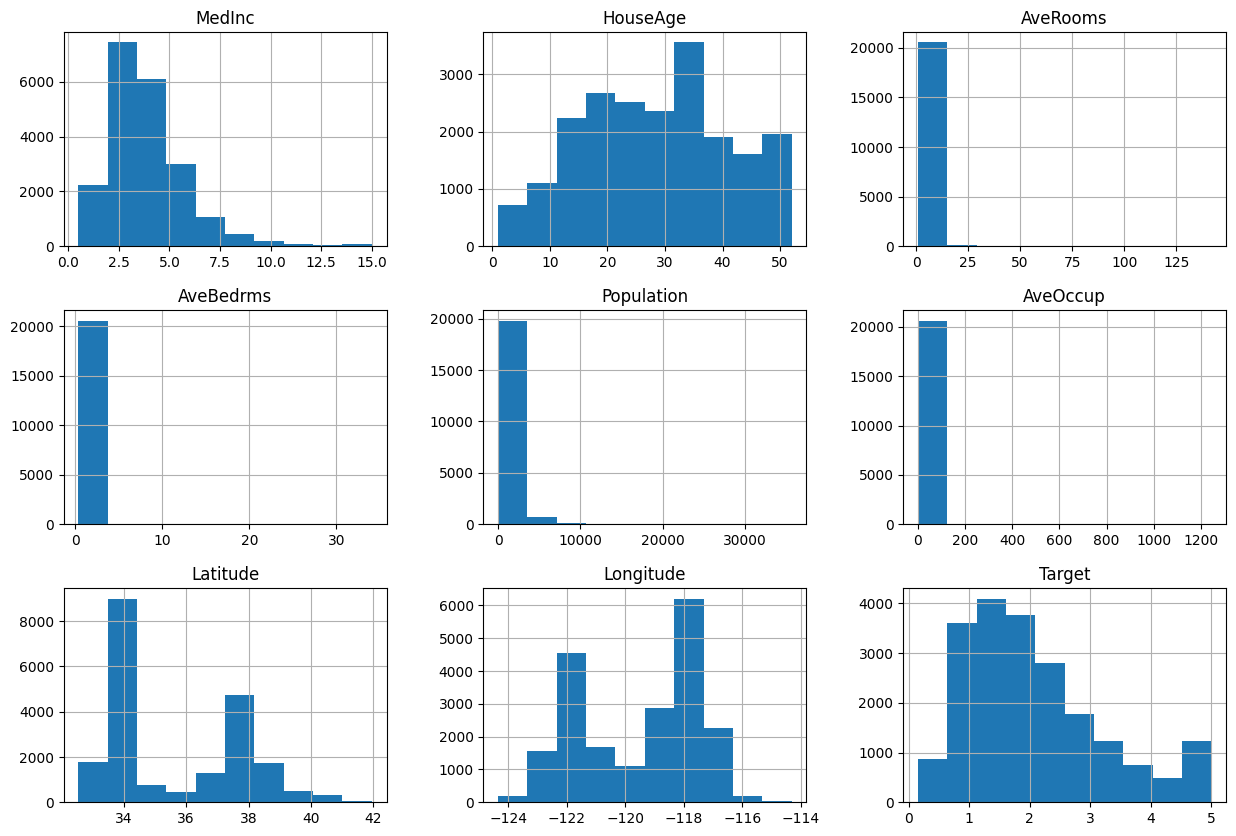

In [37]:
df.hist(figsize=(15,10))
plt.show()

In [38]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


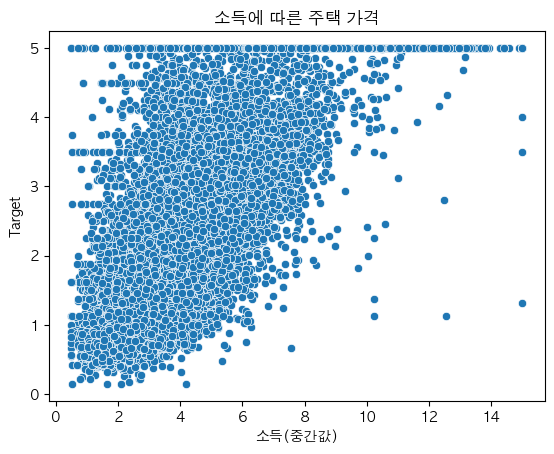

In [44]:
# 소득에 따른 주택 가격
sns.scatterplot(data=df,x='MedInc',y='Target')
plt.title('소득에 따른 주택 가격')
plt.xlabel('소득(중간값)')
plt.show()

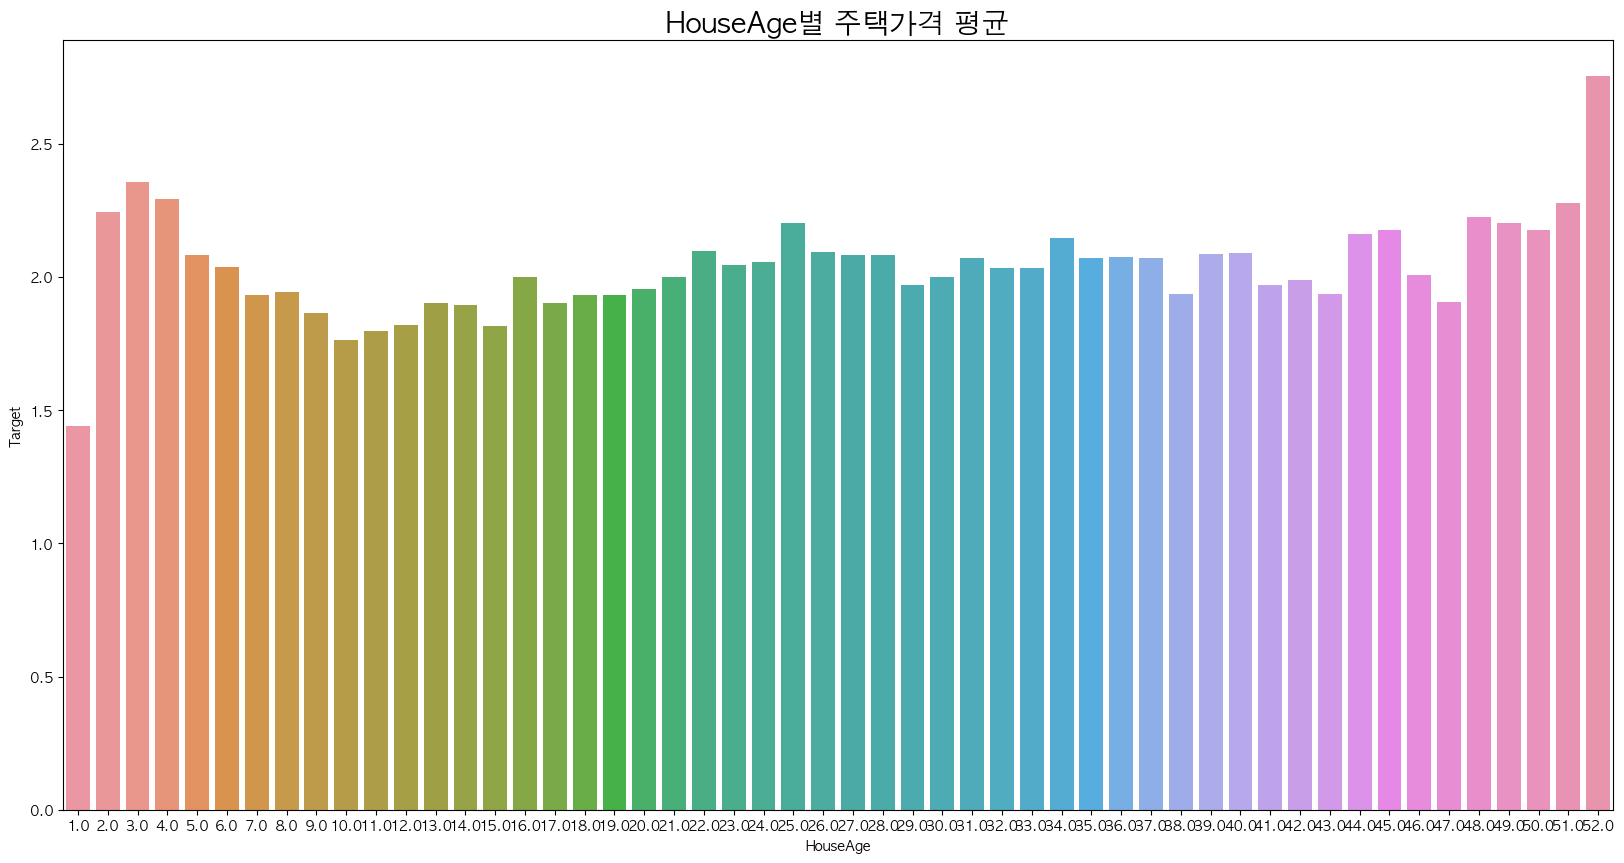

In [74]:
houseage_price = df.groupby(['HouseAge'])['Target'].mean()
plt.figure(figsize = (20,10))
sns.barplot(x=houseage_price.index,y=houseage_price)
plt.title('HouseAge별 주택가격 평균',size=20)
plt.show()

##### AveRooms,AveBedrms의 관계확인 및 이상치 제거

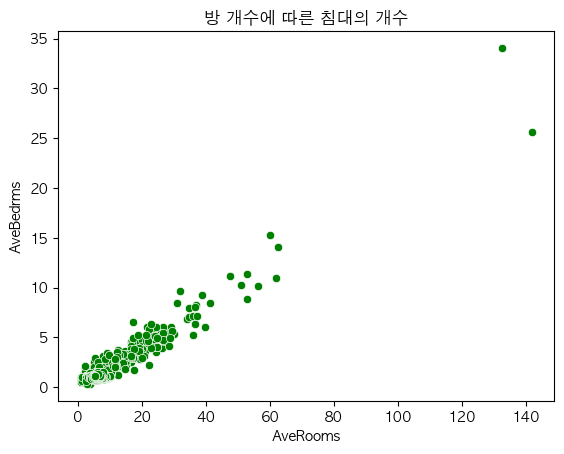

In [82]:
# AveRooms,AveBedrms는 매우 강한 상관관계를 가지고 있음으로 이를 확인해 보는 작업 필요
# 이상치 제거 과정이 필요해 보임
sns.scatterplot(x=df['AveRooms'],y=df['AveBedrms'],color='g')
plt.title('방 개수에 따른 침대의 개수')
plt.show()

In [110]:
df['AveRooms'].sort_values().sort_values(ascending = False).index[:2]

Index([1914, 1979], dtype='int64')

In [211]:
# 이상치 확인
df[['AveRooms','AveBedrms']].iloc[[1914,1979]]

,AveRooms,AveBedrms
1914,141.909091,25.636364
1979,132.533333,34.066667


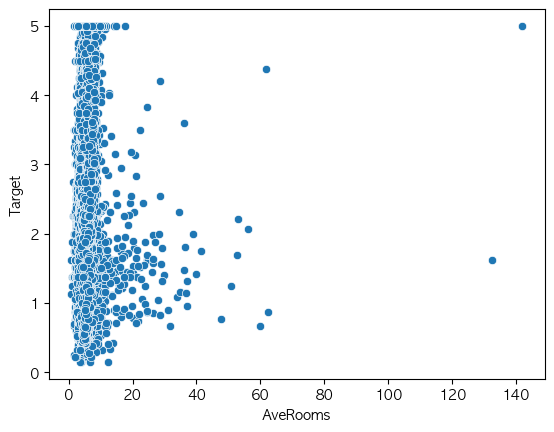

In [213]:
sns.scatterplot(data=df,x='AveRooms',y='Target')
plt.show()

##### 인구 수에따른 주택가격 비교

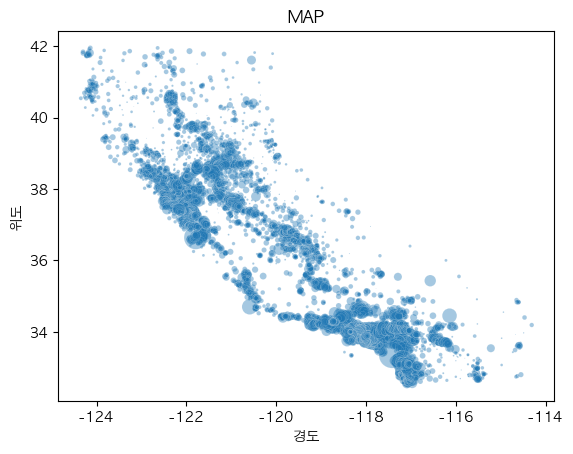

In [143]:
sns.scatterplot(data=df,x='Longitude',y='Latitude',alpha=0.4,s=df["Population"]/100)
plt.title('MAP')
plt.xlabel('경도')
plt.ylabel('위도')
plt.show()

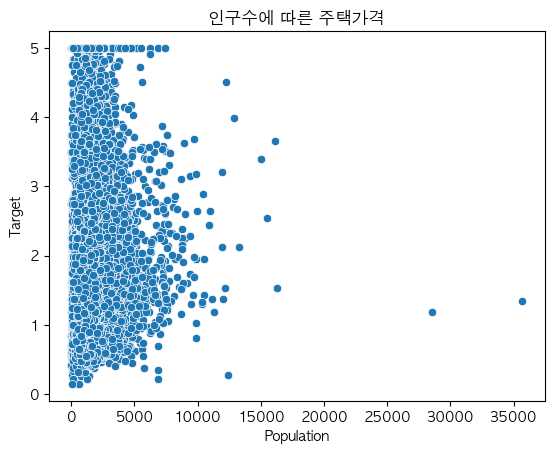

In [145]:
sns.scatterplot(x=df1['Population'],y=df1['Target'])
plt.title('인구수에 따른 주택가격')
plt.show()

In [181]:
# df['Population'].sort_values(ascending=False)[:2]
df.iloc[[9880,15360]][['Population','Target']]

,Population,Target
9880,28566.0,1.188
15360,35682.0,1.344


##### AveOccup에 따른 주택 가격

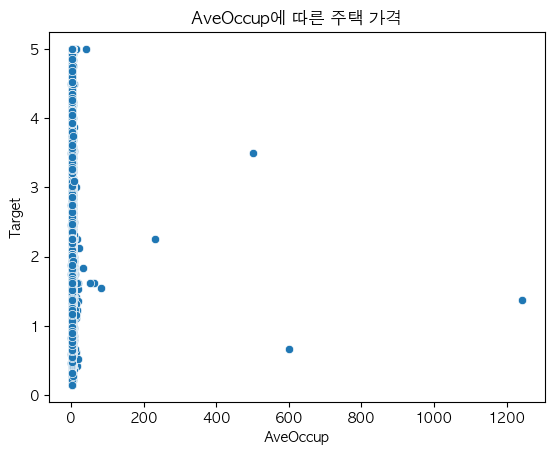

In [183]:
sns.scatterplot(data=df,x='AveOccup',y='Target')
plt.title('AveOccup에 따른 주택 가격')
plt.show()

In [188]:
df['AveOccup'].sort_values(ascending=False)

19006    1243.333333
3364      599.714286
16669     502.461538
13034     230.172414
9172       83.171429
            ...     
4623        1.066176
19427       1.060606
19522       0.970588
5342        0.750000
11849       0.692308
Name: AveOccup, Length: 20640, dtype: float64

In [191]:
df.iloc[[19006]][['AveOccup']]

,AveOccup
19006,1243.333333


AveRooms/AveBedrms 이상치 index 1914,1979

Population 이상치 index 9880,15360

AveOccup 이상치 index 19006

In [234]:
df.iloc[[1914,1979,9880,15360,19006]]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500
9880,2.3087,11.0,5.364518,1.059684,28566.0,4.696810,36.64,-121.79,1.18800
15360,2.5729,14.0,5.270497,1.010484,35682.0,7.482072,33.35,-117.42,1.34400
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500


In [236]:
df.drop(index=[1914,1979],inplace=True)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [268]:
df.reset_index()

,index,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...,...
20633,20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20634,20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20635,20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20636,20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [249]:
#df.iloc[[9878,15358]]
df['Population'].iloc[9878] = df['Population'].mean()
df['Population'].iloc[15358] = df['Population'].mean()

In [259]:
df['AveOccup'].iloc[[19004]] = df['AveOccup'].mean()
df['AveOccup'].iloc[[19004]]

19006    3.010605
Name: AveOccup, dtype: float64

In [256]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000
mean,3.870731,28.639015,5.416228,1.093889,1422.636461,3.010608,35.631549,-119.569654,2.068438
std,1.899856,12.586076,2.106307,0.377825,1090.798269,5.773935,2.135820,2.003622,1.153828
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563750,18.000000,4.440652,1.006067,787.000000,2.429828,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.228973,1.048780,1166.000000,2.818295,34.260000,-118.490000,1.797000
75%,4.743550,37.000000,6.052120,1.099499,1724.750000,3.282249,37.710000,-118.010000,2.647000
max,15.000100,52.000000,62.422222,15.312500,16305.000000,599.714286,41.950000,-114.310000,5.000010


In [ ]:
# 데이터 정규화

In [267]:
df.value_counts()

MedInc   HouseAge  AveRooms   AveBedrms  Population  AveOccup  Latitude  Longitude  Target 
0.4999   10.0      6.740000   2.040000   108.0       2.160000  34.69     -116.90    0.55000    1
4.2500   34.0      6.063910   0.996241   631.0       2.372180  38.53     -121.51    1.91900    1
4.2458   52.0      3.912999   1.064483   1830.0      1.873081  37.80     -122.42    4.50000    1
4.2454   33.0      6.073746   1.064897   1073.0      3.165192  34.12     -117.87    1.83800    1
                   4.604207   1.021033   1644.0      3.143403  33.88     -118.36    2.36800    1
                                                                                              ..
2.8919   52.0      5.140506   1.089873   2290.0      2.898734  34.10     -118.14    2.58400    1
2.8917   33.0      4.699346   1.009804   1378.0      4.503268  34.20     -118.37    1.70400    1
2.8913   23.0      5.038674   0.977901   1146.0      3.165746  36.43     -119.85    0.60900    1
2.8910   11.0      3.764323   1.238

### Tip: scaler 사용 방법
간단한 사용법은 아래와 같습니다. 필수사항은 아니기에 관심있으시면 공부해보시는 것을 추천드립니다.

In [273]:
# 이를 위해 pip install scikit-learn 을 해야 할 수 있습니다.

# Z score Scaler 사용법
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(df) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입

# Min-Max Scaler 사용법
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data2 = scaler.fit_transform(df) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입

In [288]:
scaled_data1

array([[ 2.34469213,  0.98213967,  0.74440113, ...,  1.05275972,
        -1.32780039,  2.12997342],
       [ 2.33216456, -0.60695651,  0.39022289, ...,  1.04339541,
        -1.32280931,  1.31440715],
       [ 1.78263583,  1.85614257,  1.36351336, ...,  1.03871325,
        -1.33279147,  1.25893824],
       ...,
       [-1.14260452, -0.92477575, -0.10002832, ...,  1.77849384,
        -0.82370115, -0.9927527 ],
       [-1.05459571, -0.84532094, -0.04117024, ...,  1.77849384,
        -0.87361196, -1.05862203],
       [-0.78014717, -1.00423056, -0.07668156, ...,  1.75040091,
        -0.83368331, -1.01788705]])

In [275]:
scaled_data2

array([[0.53966842, 0.78431373, 0.09968115, ..., 0.5674814 , 0.21115538,
        0.90226638],
       [0.53802706, 0.39215686, 0.08756621, ..., 0.565356  , 0.21215139,
        0.70824656],
       [0.46602805, 1.        , 0.12085835, ..., 0.5642933 , 0.21015936,
        0.69505074],
       ...,
       [0.08276438, 0.31372549, 0.0707968 , ..., 0.73219979, 0.31175299,
        0.15938285],
       [0.09429525, 0.33333333, 0.07281009, ..., 0.73219979, 0.30179283,
        0.14371281],
       [0.13025338, 0.29411765, 0.0715954 , ..., 0.72582359, 0.30976096,
        0.15340349]])